In [1]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [2]:
print("X_Train:",x_train.shape)

X_Train: (60000, 28, 28)


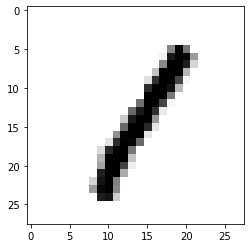

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[23], cmap='binary')
plt.show()

In [4]:
print(y_train[0])

5


In [5]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [7]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print('x_train_reshaped shape:',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


In [9]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm =(x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm =(x_test_reshaped - x_mean)/(x_std + epsilon)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [11]:
model.compile(
    optimizer='sgd',
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 926us/step - loss: 0.3817 - accuracy: 0.8891
Epoch 2/3
1875/1875 [==============================] - 2s 898us/step - loss: 0.1909 - accuracy: 0.9442
Epoch 3/3
1875/1875 [==============================] - 2s 883us/step - loss: 0.1441 - accuracy: 0.9582


In [13]:
loss , accuracy = model.evaluate(x_test_norm,y_test_encoded) 
print('Test set accuracy', accuracy *100,"%")

313/313 [==============================] - 0s 703us/step - loss: 0.1325 - accuracy: 0.9597
Test set accuracy 95.96999883651733 %


In [14]:
preds = model.predict(x_test_norm)
print("Shape of preds:",preds.shape)

313/313 [==============================] - 0s 615us/step
Shape of preds: (10000, 10)


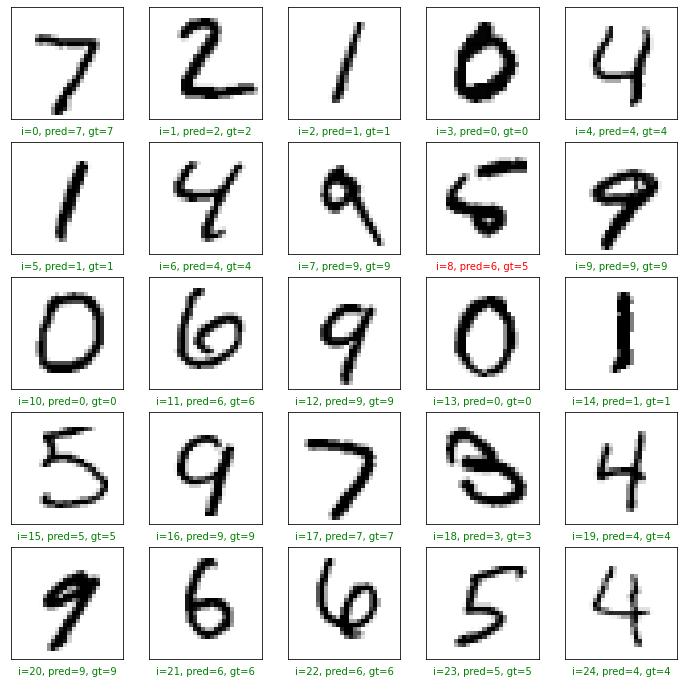

In [15]:
plt.figure(figsize=(12,12))

start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred= np.argmax(preds[start_index+i])
    gt =y_test[start_index+i]
    
    col = 'g'
    if pred !=gt:
        col ='r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

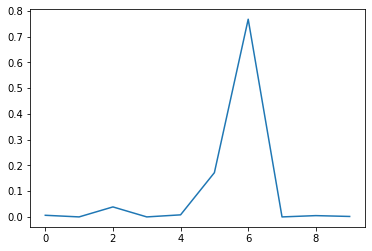

In [18]:
plt.plot(preds[8])
plt.show